In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

C:\Users\anjel\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Function to install and load libraries
def install_and_load(package):
    try:
        __import__(package)
    except ImportError:
        import pip
        pip.main(['install', package])
    finally:
        globals()[package] = __import__(package)

# Load required libraries
libraries = ["pandas", "numpy", "matplotlib", "seaborn", "geopandas"]
for lib in libraries:
    install_and_load(lib)

In [3]:
# Reading the file
data = pd.read_csv("C:\\Users\\ayas\\Downloads\\SCMA\\NSSO68.csv")

C:\Users\anjel\AppData\Local\Temp\ipykernel_22220\3548506366.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\anjel\\Downloads\\SCMA\\NSSO68.csv")


In [4]:
# Filtering for MH
df = data[data['state_1'] == "MH"]


In [5]:
# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
      slno                                 grp  Round_Centre  FSU_number  \
7577  7578  42099999999999999683095301193728.0             1       42100   
7578  7579  42099999999999999683095301193728.0             1       42100   
7579  7580  42099999999999999683095301193728.0             1       42100   
7580  7581  42099999999999999683095301193728.0             1       42100   
7581  7582  42099999999999999683095301193728.0             1       42100   

      Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
7577     68               10       1       2     27           271  ...   
7578     68               10  

In [6]:
# Finding missing values
missing_info = df.isnull().sum()
print("Missing Values Information:")
print(missing_info)


Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [7]:
# Subsetting the data
mhnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]


In [8]:
# Function to remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]


In [9]:
# Remove outliers
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    mhnew = remove_outliers(mhnew, col)


In [10]:
# Summarize consumption
mhnew['total_consumption'] = mhnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)


In [12]:
 # Function to summarize consumption
def summarize_consumption(group_col):
    summary = mhnew.groupby(group_col)['total_consumption'].sum().sort_values(ascending=False).reset_index()
    return summary


In [13]:
# Summarize and display top consuming districts and regions
district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')


In [14]:
print("Top Consuming Districts:")
print(district_summary.head(6))
print("Region Consumption Summary:")
print(region_summary)


Top Consuming Districts:
   District  total_consumption
0        22        2281.493221
1        25        2156.709307
2        21        1919.437063
3         9        1658.516640
4        20        1517.650472
5         7        1469.264944
Region Consumption Summary:
   Region  total_consumption
0       5        7382.417335
1       2        7374.372680
2       4        6553.860414
3       1        5196.787174
4       3        3597.238645
5       6        1055.132897


In [15]:
# Rename districts and sectors
district_mapping = {
    '1': 'Nandurbar', '2': 'Dhule', '3': 'Jalgaon', '4': 'Buldana', '5': 'Akola', '6': 'Washim', '7': 'Amravati', 
    '8': 'Wardha', '9': 'Nagpur', '10': 'Bhandara', '11': 'Gondiya', '12': 'Gadchiroli', '13': 'Chandrapur', 
    '14': 'Yavatmal', '15': 'Nanded', '16': 'Hingoli', '17': 'Parbhani', '18': 'Jalna', '19': 'Aurangabad', 
    '20': 'Nashik', '21': 'Thane', '22': 'Mumbai (Suburban)', '24': 'Raigarh', '25': 'Pune', '26': 'Ahmadnagar', 
    '27': 'Bid', '28': 'Latur', '29': 'Osmanabad', '30': 'Solapur', '31': 'Satara', '32': 'Ratnagiri', 
    '33': 'Sindhudurg', '34': 'Kolhapur', '35': 'Sangli'
}
sector_mapping = {'2': 'URBAN', '1': 'RURAL'}


In [16]:
mhnew['District'] = mhnew['District'].astype(str).map(district_mapping).fillna(mhnew['District'])
mhnew['Sector'] = mhnew['Sector'].astype(str).map(sector_mapping).fillna(mhnew['Sector'])

print(mhnew)

      state_1 District  Region Sector  State_Region  Meals_At_Home  ricepds_v  \
7577       MH    Thane       1  URBAN           271           56.0        0.0   
7578       MH    Thane       1  URBAN           271           60.0        0.0   
7579       MH    Thane       1  URBAN           271            0.0        0.0   
7580       MH    Thane       1  URBAN           271           60.0        0.0   
7581       MH    Thane       1  URBAN           271           60.0        0.0   
...       ...      ...     ...    ...           ...            ...        ...   
78733      MH  Gondiya       6  RURAL           276           60.0        0.0   
78734      MH  Gondiya       6  RURAL           276           60.0        0.0   
78735      MH  Gondiya       6  RURAL           276           60.0        0.0   
78737      MH  Gondiya       6  RURAL           276           60.0        0.0   
78739      MH  Gondiya       6  RURAL           276           20.0        0.0   

       Wheatpds_q  chicken_

In [17]:
# Aggregate total consumption per district
MH_consumption = mhnew.groupby('District')['total_consumption'].sum().reset_index()


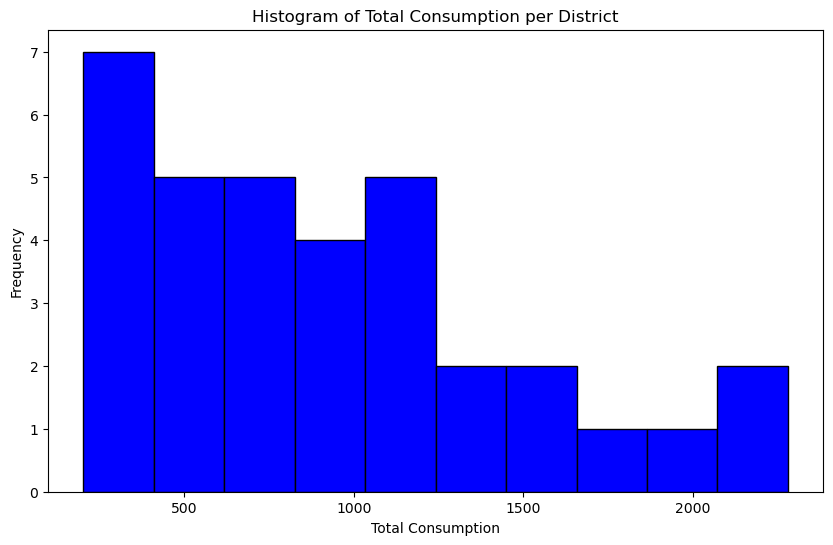

In [18]:
# Data for histogram
consumption_values = MH_consumption['total_consumption']

# Histogram of total consumption values
plt.figure(figsize=(10, 6))
plt.hist(consumption_values, bins=10, color='blue', edgecolor='black')
plt.xlabel("Total Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Total Consumption per District")
plt.show()

In [19]:
print(MH_consumption)

             District  total_consumption
0          Ahmadnagar        1279.320011
1               Akola         755.087284
2            Amravati        1469.264944
3          Aurangabad        1397.125198
4            Bhandara         212.412857
5                 Bid         934.395527
6             Buldana        1166.113276
7          Chandrapur         436.293452
8               Dhule         598.307630
9          Gadchiroli         201.977381
10            Gondiya         204.449206
11            Hingoli         582.150298
12            Jalgaon        1156.253727
13              Jalna         882.237193
14           Kolhapur        1063.427579
15              Latur         683.832293
16  Mumbai (Suburban)        2281.493221
17             Nagpur        1658.516640
18             Nanded         919.413851
19          Nandurbar         325.026816
20             Nashik        1517.650472
21          Osmanabad         471.701184
22           Parbhani         683.004870
23              

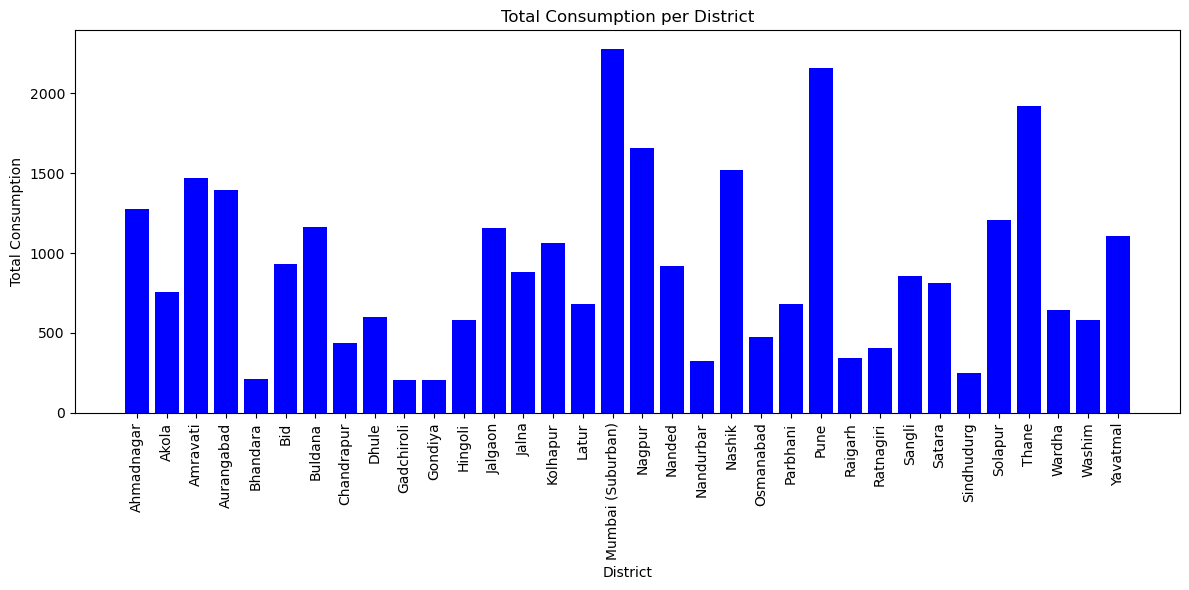

In [20]:
# Bar plot of total consumption per district
plt.figure(figsize=(12, 6))
plt.bar(MH_consumption['District'], MH_consumption['total_consumption'], color='blue')
plt.xticks(rotation=90)
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.tight_layout()
plt.show()

In [21]:
# Plot total consumption on the Maharashtra state map
data_map = gpd.read_file("C:\\Users\\anjel\\Downloads\\MAHARASHTRA_DISTRICTS.geojson")


In [24]:
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = data_map.merge(MH_consumption, on='District')

print(data_map)


           District       stname stcode11 dtcode11   year_stat  Shape_Length  \
0           Gondiya  MAHARASHTRA       27      507      2011_c  6.156793e+05   
1          Bhandara  MAHARASHTRA       27      506      2011_c  5.814605e+05   
2           Jalgaon  MAHARASHTRA       27      499      2011_c  8.464308e+05   
3            Wardha  MAHARASHTRA       27      504      2011_c  5.427471e+05   
4           Buldana  MAHARASHTRA       27      500      2011_c  8.070028e+05   
5             Akola  MAHARASHTRA       27      501      2011_c  6.558520e+05   
6            Nashik  MAHARASHTRA       27      516      2011_c  9.720056e+05   
7        Gadchiroli  MAHARASHTRA       27      508      2011_c  9.979445e+05   
8            Washim  MAHARASHTRA       27      502      2011_c  6.328348e+05   
9        Chandrapur  MAHARASHTRA       27      509      2011_c  7.410244e+05   
10         Yavatmal  MAHARASHTRA       27      510      2011_c  1.014942e+06   
11            Jalna  MAHARASHTRA       2

C:\Users\anjel\AppData\Local\Temp\ipykernel_22220\2474865875.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


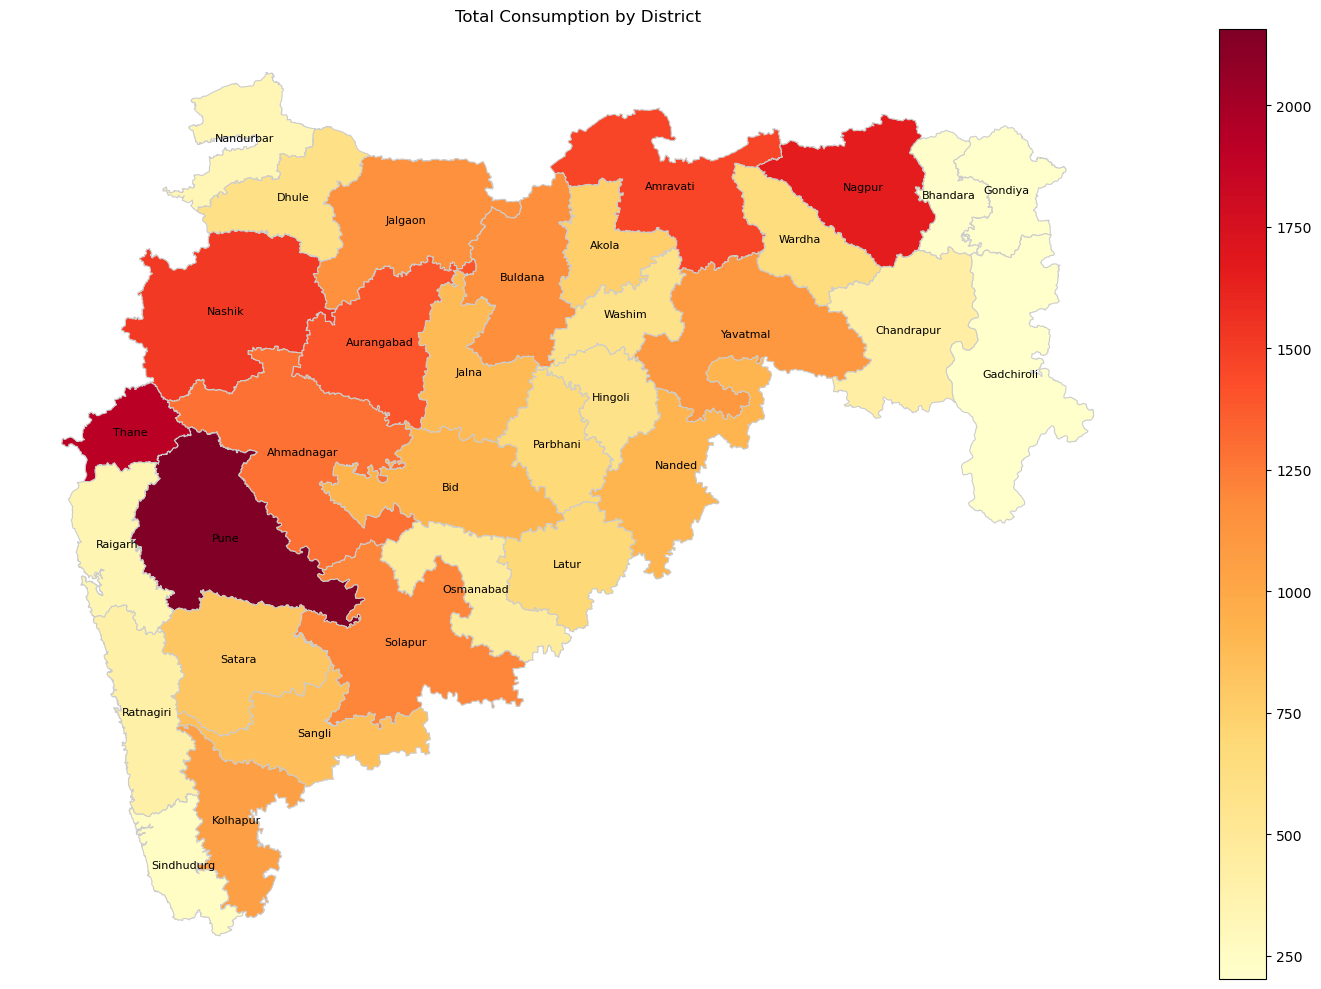

In [25]:

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', ax=ax)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=data_map_data['total_consumption'].min(), vmax=data_map_data['total_consumption'].max()))
sm._A = []
cbar = fig.colorbar(sm)

# Add labels
ax.set_title('Total Consumption by District')
for idx, row in data_map_data.iterrows():
    ax.annotate(text=row['District'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center', va='center', fontsize=8)

plt.axis('off')
plt.tight_layout()
plt.show()